# Project: Investigate a TMDb Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This TMDb Movies dataset contains the qualitative data of 10,000 movies from The Movie Database (TMDb) as well as the quantitative data such as buget, user ratings, and revenue
>
> From these data that has been given, there are 3 explorations we can made: 
   <li> 1. we can identify the relevant properties associate with higher revenue</a></li>
   <li> 2. we can identify what genres are the most popular </a></li>
   <li> 3. we can identify what genres have the highest budget</a></li>

### Import the relevant libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

#### Explore the first row of the data

In [10]:
movie_df = pd.read_csv('tmdb-movies.csv')
movie_df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


#### Explore the data type and null

In [4]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Find number of nulls in each column

In [7]:
movie_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Identify unique values in each column

In [8]:
movie_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

#### Identify unique genres

In [9]:
movie_df.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

#### Identify distinct release years

In [26]:
movie_df.release_year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966])

### Data Cleaning 

#### Drop irrelevant columns

In [ ]:
movie_df.drop(['homepage', 'tagline', 'keywords', 'production_companies'], axis=1, inplace=True)

In [19]:
movie_df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [21]:
movie_df.isnull().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

#### Drop NA

In [22]:
movie_df.dropna(inplace=True)

In [23]:
movie_df.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Identify relevant properties associate with higher revenue

### Explore data visually

#### Plot the revenue data in a histogram to see how the revenue is distributed

Text(0.5, 0, 'Revenue')

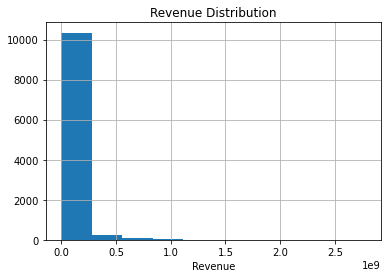

In [106]:
movie_df.revenue.hist()
plt.title('Revenue Distribution')
plt.xlabel('Revenue')

From the graph, the revenue is right skew. The graph does not answer the question much, therefore need to further see the relationship between attributes and revenue

In [109]:
cols = ['popularity', 'budget', 'vote_count']

#### Select the attributes that could associated with revenue and then plot the relationship

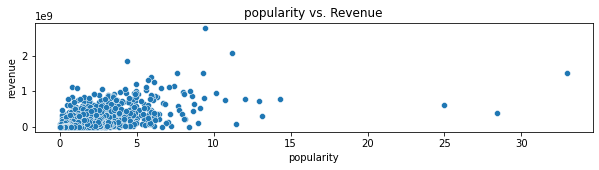

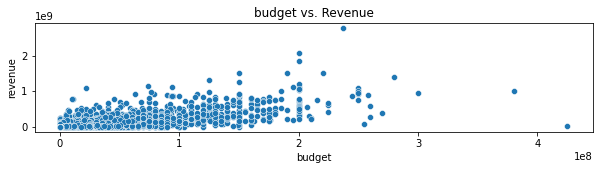

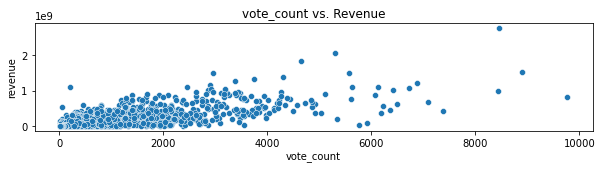

In [116]:
for col in cols:   
    plt.figure(figsize=(10, 2));
    plt.title(f'{col} vs. Revenue')
    sns.scatterplot(y=movie_df['revenue'], x=movie_df[col]);
    plt.show()

From the selected attributes: popularity, budget, and vote_count. They show slightly positive correlation. These attributes are moderately associated with revenue

#### Explore correlation between each column

Text(0.5, 1.0, 'Correlation Table')

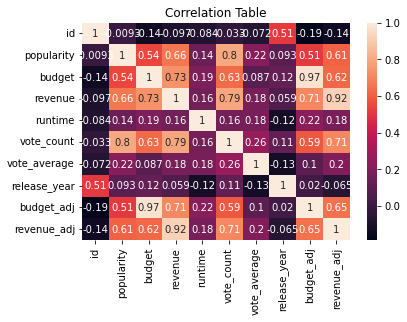

In [104]:
movie_df_corr = movie_df.corr()
sns.heatmap(movie_df_corr, annot=True)
plt.title('Correlation Table')

The correlation table does match with the above graphs about the correlation of each attribute with the revenue. From the chart, popularity, budget, vote_count, budget_adj show higher correlation scores that are higher than 0.5, thus highly correlates with revenue.

### Research Question 2: Most popular genres

#### Group the release year and genres sorted by mean vote_count

In [56]:
gen = movie_df.groupby(['release_year', 'genres']).vote_count.mean().sort_values(ascending=False)
gen.head(30)

release_year  genres                                           
2010          Action|Thriller|Science Fiction|Mystery|Adventure    9767.0
2012          Science Fiction|Action|Adventure                     8903.0
2009          Action|Adventure|Fantasy|Science Fiction             8458.0
2008          Drama|Action|Crime|Thriller                          8432.0
2012          Drama|Western                                        7375.0
              Science Fiction|Adventure|Fantasy                    7080.0
2014          Adventure|Drama|Science Fiction                      6498.0
2012          Adventure|Fantasy|Action                             6417.0
2008          Action|Science Fiction|Adventure                     6220.0
2001          Adventure|Fantasy|Action                             6079.0
2015          Action|Adventure|Science Fiction|Thriller            5873.5
1994          Drama|Crime                                          5754.0
2014          Action|Science Fiction|Adventure  

In [58]:
gen10=gen.head(10)

#### show the groupby data visually

Text(0.5, 1.0, 'Top 10 most popular genres')

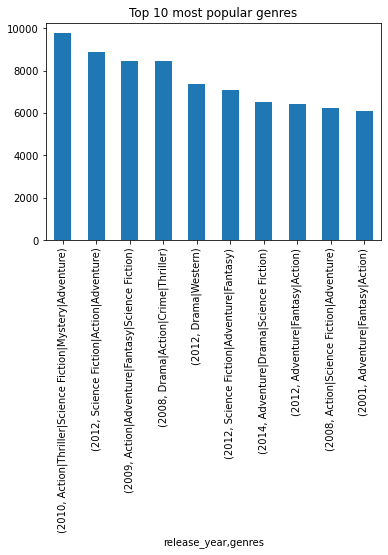

In [107]:
gen10.plot(x='genres', y='popularity', kind='bar')
plt.title('Top 10 most popular genres')

The bar chart shows the above groupby table visually, confirming the Action|Thriller|Science Fiction|Mystery|Adventure genres have the most budget at 9767.0

### Research Question 3: What genres have the highest budget

#### Group genres sorted by mean budget

In [62]:
bud = movie_df.groupby(['genres']).budget.mean().sort_values(ascending=False)
bud.head(30)

genres
Adventure|Fantasy|Action|Western|Thriller             425000000.0
Thriller|Action|Adventure|Science Fiction             209000000.0
Family|Fantasy|Adventure                              200000000.0
Adventure|Action|Fantasy                              198000000.0
Action|Family|Science Fiction|Adventure|Mystery       190000000.0
Animation|Adventure|Comedy|Family|Action              185000000.0
Fantasy|Adventure|Action|Family|Romance               180000000.0
Science Fiction|Fantasy|Action|Adventure              176000003.0
War|Adventure|Drama                                   175000000.0
Adventure|Family|Animation|Action|Comedy              165000000.0
Comedy|Adventure|Fantasy|Animation|Family             165000000.0
Fantasy|Adventure|Animation|Family                    165000000.0
Action|Science Fiction|Thriller|Western               163000000.0
War|Adventure|Science Fiction                         160000000.0
Action|Thriller|Science Fiction|Mystery|Adventure     160000000.0
Hor

In [63]:
bud10 = bud.head(10)

#### Show the groupby data visually

Text(0.5, 1.0, 'Top 10 highest budget genres')

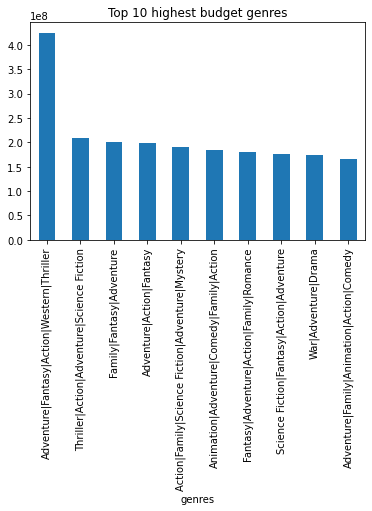

In [108]:
bud10.plot(x='genres', y='budget', kind='bar')
plt.title('Top 10 highest budget genres')

The bar plot shows the groupby table above visually, confirming that Adventure|Fantasy|Action|Western|Thriller are the genres with most budget

<a id='conclusions'></a>
## Conclusions

> Based on the Exploratory Data Analysis that I have performed, the findings can be concluded that:
    <li>1. Relevant properties asscociated with higher revenues are popularity, budget, and vote count. The reason for this conclusion is the graph that has been displayed, there were slightly upward trends.</li>
    <li>2. The most popular genres identified are Action|Thriller|Science Fiction|Mystery|Adventure, gaining the highest vote_count mean at 976</li>
    <li>3. The highest budget genres are Adventure|Fantasy|Action|Western|Thriller with the budget at 425000000
</li>  

> Limitations that I found while performing the analysis are:
    <li>1. There should be other attributes available in the dataset that could better associate with higher revenue</li>
    <li>2. Because there is no currency in the Budget column, we do not know if the budgets are in the same currency</li>
    
